In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay, classification_report, roc_auc_score, RocCurveDisplay
from sklearn.naive_bayes import MultinomialNB, ComplementNB 
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.pipeline import Pipeline

In [4]:
#uploading dataframe with new processed_text column 
df = pd.read_csv('data/processed_text.csv')

In [5]:
#dropping the 'Unnamed: 0' column
df.drop(columns='Unnamed: 0', axis=1, inplace=True)

In [6]:
pd.set_option('display.max_columns', None)
df.head()

,YEAR,NEAREST_TOWN,NEAREST_ROAD,OBSERVED,ALSO_NOTICED,OTHER_WITNESSES,OTHER_STORIES,TIME_AND_CONDITIONS,ENVIRONMENT,REPORT_NUMBER,location_details,county,state,season,title,latitude,longitude,number,classification,geohash,temperature_high,temperature_mid,temperature_low,dew_point,humidity,cloud_cover,moon_phase,precip_intensity,precip_probability,precip_type,pressure,summary,uv_index,visibility,wind_bearing,wind_speed,processed_text
0,2010,Double Springs,Highway 33,I was canoeing on the Sipsey river in Alabama....,3 hours before on river while I paused to fix ...,none,"No, but I've had a couple of weird things happ...","Dusk, was a clear day in about the high 80s te...",River running through a very remote forest are...,30680.0,NaN,Winston County,Alabama,Summer,NaN,NaN,NaN,30680.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"['can', 'tipsy', 'river', 'alabama', 'dusk', '..."
1,1990,NaN,NaN,Ed L. was salmon fishing with a companion in P...,NaN,On a commercial fishing boat at anchor at the ...,NaN,"Early Fall, in the early 1990's.",NaN,1261.0,East side of Prince William Sound,Valdez-Chitina-Whittier County,Alaska,Fall,NaN,NaN,NaN,1261.0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"['salmon', 'fish', 'companion', 'prince', 'wil..."
2,1974,Wakefield,Perry Ave.,"While attending U.R.I in the Fall of 1974,I wo...",none,none,"White gorilla was seen in a gravel pit, by a f...","10:00pm, very dark cool night.","Typical new England. Oak,Pine and Maple trees....",6496.0,"Great swamp area, Narragansett Indians",Washington County,Rhode Island,Fall,Report 6496: Bicycling student has night encou...,41.45,-71.5,6496.0,1,drm5ucxrc0,78.17,73.425,68.68,65.72,0.86,0.86,0.16,0.0,0.0,NaN,1020.61,Foggy until afternoon.,4.0,2.75,198.0,6.92,"['attend', 'stay', 'girlfriend', 'mother', 'ho..."
3,1972,York; more specifically Manchester twp.,Raintree Road,"Hello, My name is Doug and though I am very re...",My friend noted that he had spent the night be...,3. Don't remember the name of the third. He wa...,Just noting that my friend spent the night bef...,Incident occured somewhere between the hours o...,NaN,8000.0,I would rather not have exact location (listin...,York County,Pennsylvania,Summer,NaN,NaN,NaN,8000.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"['hello', 'name', 'reluctant', 'post', 'story'..."
4,1984,Yamhill,NW Fairdale,It was May 1984. Two friends and I were up in ...,Not sure. It took me a full 5 years to be able...,There were two other wittness' other than me. ...,NaN,I know that it was May of 1984 because it was ...,Gravel logging road. Very dense fir forests. B...,703.0,"Logging roads north west of Yamhill, OR, about...",Yamhill County,Oregon,Spring,NaN,NaN,NaN,703.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"['friend', 'hill', 'yamhill', 'late', 'even', ..."


In [7]:
#defining the predictor/target variables
X = df['processed_text']
y = df['classification']

In [8]:
#splitting the dataset 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=88)

## Naive Bayes classifier - Multinomial

### Using Count Vectorizer

In [9]:
count_vectorizer = CountVectorizer(stop_words='english')
count_train = count_vectorizer.fit_transform(X_train.values)
count_test = count_vectorizer.transform(X_test.values)

In [10]:
#instantiating the classifier 
nb_classifier = MultinomialNB()
nb_classifier.fit(count_train, y_train)

MultinomialNB()

In [11]:
#using the trained model to predict the classes
pred = nb_classifier.predict(count_test)
metrics.accuracy_score(y_test, pred)

0.7964458804523424

In [12]:
metrics.confusion_matrix(y_test, pred, labels=[0,1])

array([[457, 146],
       [106, 529]])

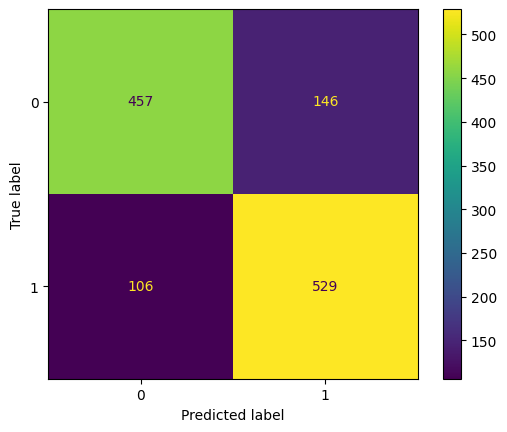

In [13]:
ConfusionMatrixDisplay.from_estimator(nb_classifier, count_test, y_test);

### Using TF-IDF Vectorizer

In [14]:
tfidf_vectorizer = TfidfVectorizer(stop_words='english')
tfidf_train = tfidf_vectorizer.fit_transform(X_train.values)
tfidf_test = tfidf_vectorizer.transform(X_test.values)

In [15]:
nb_classifier = MultinomialNB()
nb_classifier.fit(tfidf_train, y_train)

MultinomialNB()

In [16]:
pred = nb_classifier.predict(tfidf_test)
metrics.accuracy_score(y_test, pred)

0.7956381260096931

In [17]:
metrics.confusion_matrix(y_test, pred, labels=[0, 1])

array([[481, 122],
       [131, 504]])

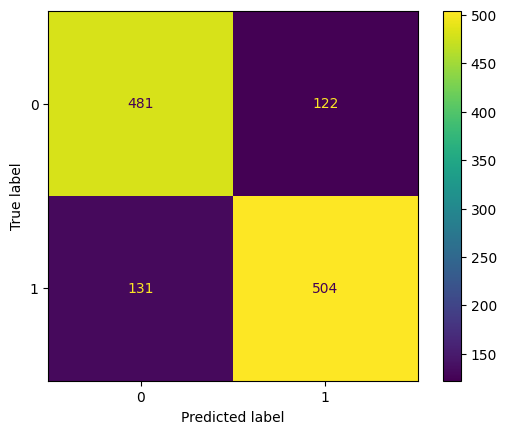

In [18]:
ConfusionMatrixDisplay.from_estimator(nb_classifier, tfidf_test, y_test);

In [19]:
class_labels = nb_classifier.classes_
feature_names = tfidf_vectorizer.get_feature_names_out

In [20]:
feat_with_weights = sorted(zip(nb_classifier.coef_[0], feature_names))

AttributeError: 'MultinomialNB' object has no attribute 'coef_'

In [21]:
# Print the first class label and the top 20 feat_with_weights entries
print(class_labels[0], feat_with_weights[:20])
# Print the second class label and the bottom 20 feat_with_weights entries
print(class_labels[1], feat_with_weights[-20:])

NameError: name 'feat_with_weights' is not defined

## Decision Tree Classifier

In [22]:
#decision tree model with count vectorizer 
tree_clf = DecisionTreeClassifier(max_depth=3, random_state=88)
tree_clf.fit(count_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=88)

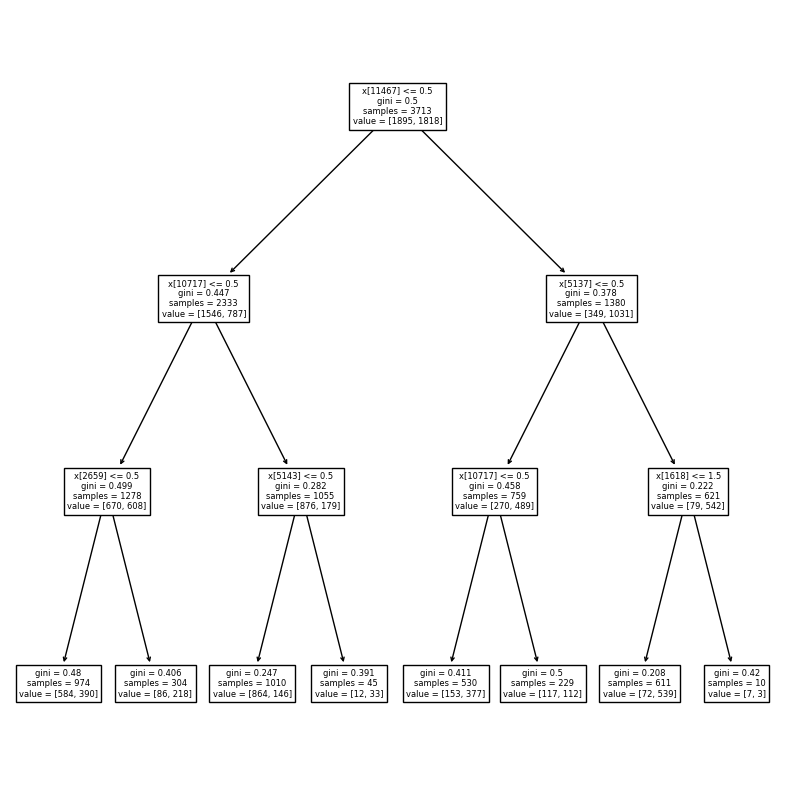

In [23]:
#plotting the decision tree
f, ax =  plt.subplots(figsize=(10,10))
plot_tree(tree_clf, ax=ax);

In [24]:
pred = tree_clf.predict(count_test)
metrics.accuracy_score(y_test, pred)

0.7180936995153473

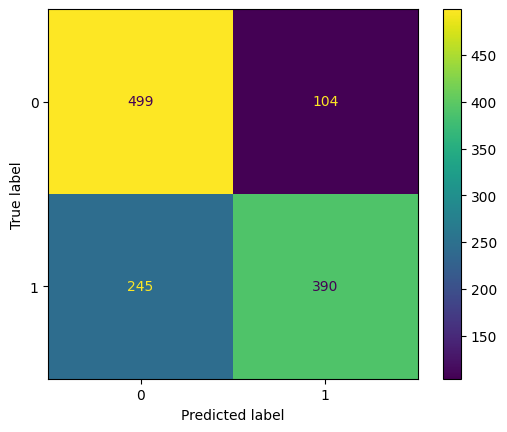

In [25]:
ConfusionMatrixDisplay.from_estimator(tree_clf, count_test, y_test);

Not as good of a model as the NB Classifier with an accuracy score of 70%.

Even with changing the parameters, the accuracy score did not fluctuate much. 

### Pipeline with CountVectorizer

In [26]:
#creating a pipeline 
prc_steps = [('countvec', CountVectorizer(min_df = 0.05, max_df = 0.95))]
preprocess_pipeline = Pipeline(prc_steps)

In [27]:
#vectorizing the text
X_train_proc = preprocess_pipeline.fit_transform(X_train)

In [28]:
X_train_proc.shape

(3713, 446)

In [29]:
#creating a bag of words 
feat_names = preprocess_pipeline['countvec'].get_feature_names_out()

pd.DataFrame(X_train_proc.toarray(), columns = feat_names)

,able,actually,afraid,afternoon,ago,ahead,air,almost,alone,along,also,always,animal,anyone,anything,anyway,ape,appear,approach,approximately,area,arm,around,arrive,ask,attention,away,back,bad,bank,bark,base,bear,become,bed,begin,believe,best,big,bigfoot,bird,bit,black,body,bottom,branch,break,brother,brown,brush,build,bush,call,camp,campfire,car,carry,catch,check,clear,clearly,climb,close,closer,color,come,completely,continue,corner,country,county,couple,cover,coyote,crazy,creature,creek,cross,cut,dad,dark,day,dead,decide,deep,deer,definitely,describe,detail,different,direction,directly,dirt,disappear,distance,dog,door,drive,drop,due,earlier,early,east,edge,else,ely,encounter,end,enough,entire,estimate,even,ever,everything,exactly,experience,explain,extremely,eye,face,fact,fall,family,far,fast,father,fear,feel,felt,fence,field,fight,figure,finally,find,fire,first,fish,flashlight,flat,follow,foot,footprint,forest,forget,friend,front,full,fur,get,give,go,good,grab,grass,ground,grow,growl,guess,gun,hair,hairy,half,hand,happen,hard,head,headlight,hear,heard,heavy,height,hell,help,hide,high,highway,hill,hit,home,hop,hour,house,however,howl,huge,human,hunt,hunter,husband,idea,immediately,inch,incident,jump,keep,kind,kiss,knew,knock,know,lake,land,large,last,late,later,lay,lead,least,leave,left,leg,legs,less,let,life,light,like,line,listen,little,live,local,locate,location,log,long,longer,look,looked,lose,lot,loud,low,make,man,many,mark,maybe,meet,mention,middle,mile,mind,mine,minute,moment,month,morning,mother,mountain,move,movement,much,name,national,neck,need,neighbor,never,new,next,night,noise,north,note,nothing,notice,noticed,observe,occur,old,open,others,outside,pack,parent,park,part,pass,past,path,people,person,pick,picture,pitch,place,play,point,possible,pretty,print,probably,property,pull,put,quickly,quiet,quite,raise,ran,reach,read,real,realize,really,reason,record,red,remember,report,rest,return,ridge,right,river,road,rock,round,run,sasquatch,saw,say,scar,scared,scream,search,season,second,see,seem,set,several,shake,shape,short,shot,shoulder,show,side,sight,sign,similar,sit,site,size,sleep,slightly,slow,slowly,small,smell,snow,someone,something,son,soon,sort,sound,south,speak,speed,spend,spot,spring,stand,star,start,state,stay,steep,step,stick,still,stood,stop,story,straight,strange,stride,sudden,suddenly,summer,sun,sure,swamp,take,talk,tall,tell,tent,thick,thing,think,thought,throw,time,toe,together,told,top,towards,town,track,trail,travel,tree,trip,truck,try,turn,type,unusual,upright,use,vehicle,view,wait,wake,walk,walked,want,watch,water,way,week,well,west,white,whole,wide,wife,wild,window,witness,wood,wooded,work,yard,year,yell,yes,yet,young
0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,1,1,1,0,0,7,0,0,3,0,0,0,0,0,2,0,0,1,1,2,0,0,1,0,0,0,0,0,0,0,0,0,0,7,0,0,0,0,0,0,0,0,0,0,1,1,2,0,3,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,1,0,2,0,0,0,0,2,0,1,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,4,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,1,0,0,0,0,0,3,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,4,0,0,0,0,4,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,2,2,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,2,0,0,1,1,1,0,3,0,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,1,0,1,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [30]:
#getting the probability of the classifications
class_priors = y_train.value_counts()/y_train.shape[0]
class_priors

classification
0    0.510369
1    0.489631
Name: count, dtype: float64

In [66]:
df['OBSERVED'][2008]

"The six of us, my boyfriend, my children, another couple and me, stopped at a boat rental tourist trap on Lake Livingston. The guys we were with went in and rented two boats for a couple of hours while we waited outside.While on the lake I felt like someone was watching me, I quickly turned around to look into the eyes of a large black hairy creature approximately 8 or 9 feet tall that was standing at the edge of the lake right next to the waters edge looking right back at me. Although I was staring right at the creatures face I could barely see its' eyes due to the extreme amount of hair. Its body was huge and block like. For a few brief seconds we stared at each other then suddenly the creatures turned to its right and took one step and went crashing through the trees which shook even the very tallest trees and sent the birds panicking into flight. Being stunned as to what I saw I hesitated to tell the others what I had seen. But I did tell the others and asked them to take me to wh

In [63]:
df['classification'][2916]

1

In [62]:
y_train

3520    0
2916    1
806     0
2824    0
2918    0
       ..
4709    0
362     0
2481    1
4047    1
2008    1
Name: classification, Length: 3713, dtype: int64

In [31]:
bow_mat = pd.DataFrame(X_train_proc.toarray(), columns = feat_names)
bow_mat['target'] = y_train
bow_mat

,able,actually,afraid,afternoon,ago,ahead,air,almost,alone,along,also,always,animal,anyone,anything,anyway,ape,appear,approach,approximately,area,arm,around,arrive,ask,attention,away,back,bad,bank,bark,base,bear,become,bed,begin,believe,best,big,bigfoot,bird,bit,black,body,bottom,branch,break,brother,brown,brush,build,bush,call,camp,campfire,car,carry,catch,check,clear,clearly,climb,close,closer,color,come,completely,continue,corner,country,county,couple,cover,coyote,crazy,creature,creek,cross,cut,dad,dark,day,dead,decide,deep,deer,definitely,describe,detail,different,direction,directly,dirt,disappear,distance,dog,door,drive,drop,due,earlier,early,east,edge,else,ely,encounter,end,enough,entire,estimate,even,ever,everything,exactly,experience,explain,extremely,eye,face,fact,fall,family,far,fast,father,fear,feel,felt,fence,field,fight,figure,finally,find,fire,first,fish,flashlight,flat,follow,foot,footprint,forest,forget,friend,front,full,fur,get,give,go,good,grab,grass,ground,grow,growl,guess,gun,hair,hairy,half,hand,happen,hard,head,headlight,hear,heard,heavy,height,hell,help,hide,high,highway,hill,hit,home,hop,hour,house,however,howl,huge,human,hunt,hunter,husband,idea,immediately,inch,incident,jump,keep,kind,kiss,knew,knock,know,lake,land,large,last,late,later,lay,lead,least,leave,left,leg,legs,less,let,life,light,like,line,listen,little,live,local,locate,location,log,long,longer,look,looked,lose,lot,loud,low,make,man,many,mark,maybe,meet,mention,middle,mile,mind,mine,minute,moment,month,morning,mother,mountain,move,movement,much,name,national,neck,need,neighbor,never,new,next,night,noise,north,note,nothing,notice,noticed,observe,occur,old,open,others,outside,pack,parent,park,part,pass,past,path,people,person,pick,picture,pitch,place,play,point,possible,pretty,print,probably,property,pull,put,quickly,quiet,quite,raise,ran,reach,read,real,realize,really,reason,record,red,remember,report,rest,return,ridge,right,river,road,rock,round,run,sasquatch,saw,say,scar,scared,scream,search,season,second,see,seem,set,several,shake,shape,short,shot,shoulder,show,side,sight,sign,similar,sit,site,size,sleep,slightly,slow,slowly,small,smell,snow,someone,something,son,soon,sort,sound,south,speak,speed,spend,spot,spring,stand,star,start,state,stay,steep,step,stick,still,stood,stop,story,straight,strange,stride,sudden,suddenly,summer,sun,sure,swamp,take,talk,tall,tell,tent,thick,thing,think,thought,throw,time,toe,together,told,top,towards,town,track,trail,travel,tree,trip,truck,try,turn,type,unusual,upright,use,vehicle,view,wait,wake,walk,walked,want,watch,water,way,week,well,west,white,whole,wide,wife,wild,window,witness,wood,wooded,work,yard,year,yell,yes,yet,young,target
0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,1,1,1,0,0,7,0,0,3,0,0,0,0,0,2,0,0,1,1,2,0,0,1,0,0,0,0,0,0,0,0,0,0,7,0,0,0,0,0,0,0,0,0,0,1,1,2,0,3,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,1,0,2,0,0,0,0,2,0,1,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,4,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,1,0,0,0,0,0,3,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,4,0,0,0,0,4,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,2,2,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,2,0,0,1,1,1,0,3,0,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,1,0,1,0,0,NaN
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

In [32]:
class1_bow_mat = bow_mat[bow_mat['target'] == 1].drop(columns = ['target'])

# class 1 token probabilities:
N_tok_1 = class1_bow_mat.sum(axis = 0) #number of count for each token
N_1 =  class1_bow_mat.values.sum() #total number of token in class

# get probabilities for each token: class 1
proba_c1 = N_tok_1/N_1

proba_c1.sort_values(ascending = False)[0:10]

see      0.016462
back     0.015043
look     0.014381
get      0.013787
go       0.012760
road     0.011842
saw      0.011335
sound    0.010849
area     0.010801
foot     0.010578
dtype: float64

In [33]:
class0_bow_mat = bow_mat[bow_mat['target'] == 0].drop(columns = ['target'])

# class 0 token probabilities:
N_tok_0 = class0_bow_mat.sum(axis = 0)
N_0 =  class0_bow_mat.values.sum() 

# get probabilities for each token: class 0
proba_c0 = N_tok_0/N_0

proba_c0.sort_values(ascending = False)[0:10]

see      0.016847
look     0.015979
back     0.014039
get      0.013715
go       0.013198
saw      0.011456
sound    0.011284
time     0.011125
road     0.010768
foot     0.010490
dtype: float64

In [34]:
from scipy.stats import multinomial

In [35]:
X_train.iloc[60]

"['winter', 'jay', 'lake', 'area', 'west', 'branch', 'state', 'park', 'friend', 'fish', 'pond', 'pond', 'mostly', 'frozen', 'spot', 'middle', 'cast', 'bait', 'dont', 'know', 'long', 'fishing', 'pond', 'figure', 'stand', 'shoreline', 'area', 'walk', 'steep', 'hill', 'get', 'top', 'turn', 'back', 'look', 'figure', 'large', 'cover', 'hair', 'walk', 'leg', 'winter', 'pond', 'frozen', 'figure', 'wear', 'clothes', 'norway', 'human', 'yes', 'old', 'take', 'scar', 'encounter', 'view', 'figure', 'maybe', 'minute']"

In [36]:
# bow vector for document
bow_mat_feat = bow_mat.drop(columns = ['target'])
word_vec = bow_mat_feat.iloc[60]
word_vec

able         0
actually     0
afraid       0
afternoon    0
ago          0
            ..
year         0
yell         0
yes          1
yet          0
young        0
Name: 60, Length: 446, dtype: int64

In [37]:
y_train.iloc[60]

1

In [38]:
article_length = word_vec.sum()
article_length

40

In [39]:
class1_likelihood = multinomial.pmf(x = word_vec.values, n = article_length, p =  proba_c1.values) #word_vec.values the counts, the x1, x2, ...xd
class0_likelihood = multinomial.pmf(x = word_vec.values, n = article_length, p =  proba_c0.values)

In [40]:
class1_likelihood*class_priors[1]

3.807451047084969e-55

In [41]:
class0_likelihood*class_priors[0]

1.8404186796396837e-55

In [42]:
np.log10(class1_likelihood*class_priors[1])

-54.41936567173914

In [43]:
np.log10(class0_likelihood*class_priors[0])

-54.735083367439806

In [44]:
from copy import deepcopy
mod_pipe = deepcopy(preprocess_pipeline)
mod_pipe.steps.append(('multinb', MultinomialNB()))
mod_pipe.steps

[('countvec', CountVectorizer(max_df=0.95, min_df=0.05)),
 ('multinb', MultinomialNB())]

In [45]:
mod_pipe.fit(X_train, y_train)

Pipeline(steps=[('countvec', CountVectorizer(max_df=0.95, min_df=0.05)),
                ('multinb', MultinomialNB())])

In [46]:
y_pred = mod_pipe.predict(X_test)

In [47]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.75      0.78       603
           1       0.78      0.84      0.81       635

    accuracy                           0.80      1238
   macro avg       0.80      0.79      0.79      1238
weighted avg       0.80      0.80      0.80      1238



In [48]:
roc_auc_score(y_test, y_pred)

0.7945195283425392

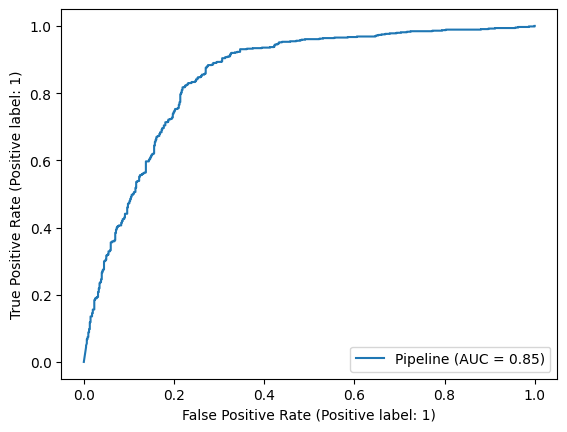

In [49]:
RocCurveDisplay.from_estimator(mod_pipe, X_test, y_test)

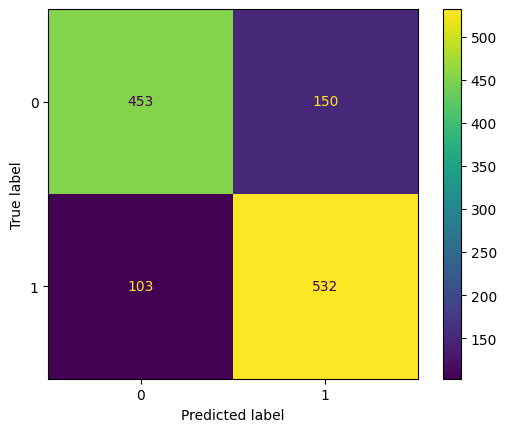

In [50]:
ConfusionMatrixDisplay.from_estimator(mod_pipe, X_test, y_test);

### Pipeline with TF-IDF Vectorizer

In [51]:
#creating a pipeline using tfidf vectorizer 
tfidfmod_pipe = deepcopy(mod_pipe)
tfidfmod_pipe.steps[0] = ('tfidf', TfidfVectorizer(min_df=0.05, max_df=0.95)) # cuts words too rare/too frequent
tfidfmod_pipe.steps

[('tfidf', TfidfVectorizer(max_df=0.95, min_df=0.05)),
 ('multinb', MultinomialNB())]

In [52]:
tfidfmod_pipe.fit(X_train, y_train)
ypred_tfidf = tfidfmod_pipe.predict(X_test)

In [53]:
roc_auc_score(y_test, ypred_tfidf)

0.7874812290254762

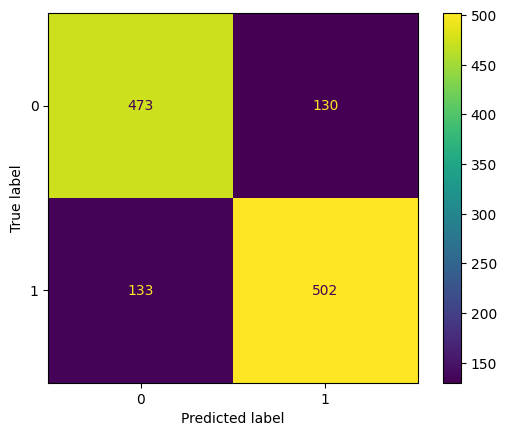

In [54]:
ConfusionMatrixDisplay.from_estimator(tfidfmod_pipe, X_test, y_test);

### Complement Naive Bayes

In [55]:
mod_comp_pipe = deepcopy(preprocess_pipeline)
mod_comp_pipe.steps.append(('compnb', ComplementNB()))
mod_comp_pipe.steps

[('countvec', CountVectorizer(max_df=0.95, min_df=0.05)),
 ('compnb', ComplementNB())]

In [56]:
mod_comp_pipe.fit(X_train, y_train)
y_pred_comp = mod_comp_pipe.predict(X_test)

In [57]:
metrics.accuracy_score(y_test, y_pred_comp)

0.7972536348949919

In [58]:
print(classification_report(y_test, y_pred_comp))

              precision    recall  f1-score   support

           0       0.82      0.75      0.78       603
           1       0.78      0.84      0.81       635

    accuracy                           0.80      1238
   macro avg       0.80      0.80      0.80      1238
weighted avg       0.80      0.80      0.80      1238



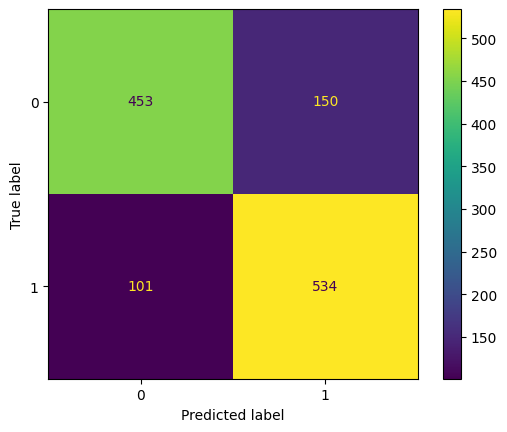

In [59]:
ConfusionMatrixDisplay.from_estimator(mod_comp_pipe, X_test, y_test);

In [60]:
#the last 100 features
count_vectorizer.get_feature_names_out()[-100:]

array(['wrong', 'wrung', 'wsu', 'wsw', 'wtf', 'wvlt', 'wwhhhoooooooo',
       'wwi', 'wwii', 'wwrruummmpfsfsfsfsss', 'wwrruummmpfsfsfsss', 'www',
       'wyandotte', 'wymeraner', 'wynooche', 'wynoochee', 'wyoming',
       'wythe', 'wytheville', 'xxx', 'xxxi', 'xxxix', 'xxxx', 'xxxxx',
       'xxxxxx', 'xxxxxxx', 'xxxxxxxx', 'yahoo', 'yahtzee', 'yaiyeee',
       'yaiyeeee', 'yakima', 'yakov', 'yamhill', 'yankee', 'yard',
       'yards', 'yardsahead', 'yardstick', 'yatesville', 'yavonovich',
       'yawn', 'yds', 'yeah', 'year', 'yearly', 'yearn', 'yell', 'yelled',
       'yelling', 'yellow', 'yellowing', 'yellowish', 'yellowood',
       'yellowpine', 'yellowstone', 'yells', 'yellville', 'yelp',
       'yelped', 'yelping', 'yep', 'yer', 'yes', 'yesterday', 'yeti',
       'yiddish', 'yield', 'yielded', 'yoke', 'yoncalla', 'yooouuuuu',
       'yoouuuuuu', 'york', 'yorkshire', 'yosemite', 'young',
       'youngblood', 'younger', 'youngster', 'youth', 'youthfulness',
       'youtube', 'ypsil

In [61]:
sorted(count_vectorizer.vocabulary_.items(), reverse = True)

[('zoology', 13211),
 ('zoologist', 13210),
 ('zoobie', 13209),
 ('zoo', 13208),
 ('zone', 13207),
 ('zip', 13206),
 ('zigziging', 13205),
 ('zigzagging', 13204),
 ('zigzag', 13203),
 ('zeus', 13202),
 ('zero', 13201),
 ('zebulon', 13200),
 ('zealand', 13199),
 ('zaleski', 13198),
 ('yuma', 13197),
 ('yr', 13196),
 ('ypsilanti', 13195),
 ('youtube', 13194),
 ('youthfulness', 13193),
 ('youth', 13192),
 ('youngster', 13191),
 ('younger', 13190),
 ('youngblood', 13189),
 ('young', 13188),
 ('yosemite', 13187),
 ('yorkshire', 13186),
 ('york', 13185),
 ('yoouuuuuu', 13184),
 ('yooouuuuu', 13183),
 ('yoncalla', 13182),
 ('yoke', 13181),
 ('yielded', 13180),
 ('yield', 13179),
 ('yiddish', 13178),
 ('yeti', 13177),
 ('yesterday', 13176),
 ('yes', 13175),
 ('yer', 13174),
 ('yep', 13173),
 ('yelping', 13172),
 ('yelped', 13171),
 ('yelp', 13170),
 ('yellville', 13169),
 ('yells', 13168),
 ('yellowstone', 13167),
 ('yellowpine', 13166),
 ('yellowood', 13165),
 ('yellowish', 13164),
 ('yellowi